# Analisys of domestric electric energy consumption

## *ANALISI CONSUMI NELLE FASCE ORARIE*


In [4]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [5]:
using CSV
using DataFrames
using Plots
using Dates

## 1. Read data from .cvs files (e-sistribuzione standards)

In [12]:
#input
year = "2022"
mounth = "gennaio"

# output - data frame
df = CSV.read("data_"*year*"/ExportData_"*mounth*".csv", DataFrame, delim=';',
    quoted=true, decimal=',', dateformat="dd/mm/yyyy",header=1)

print(df[:,1:5])

31×5 DataFrame
 Row │ Giorno      00:00-00:15  00:15-00:30  00:30-00:45  00:45-01:00 
     │ Date        Float64      Float64      Float64      Float64     
─────┼────────────────────────────────────────────────────────────────
   1 │ 2022-01-01        0.029        0.017        0.025        0.022
   2 │ 2022-01-02        0.007        0.008        0.018        0.009
   3 │ 2022-01-03        0.015        0.007        0.038        0.047
   4 │ 2022-01-04        0.009        0.007        0.018        0.01
   5 │ 2022-01-05        0.06         0.054        0.052        0.059
   6 │ 2022-01-06        0.007        0.017        0.01         0.006
   7 │ 2022-01-07        0.012        0.015        0.007        0.008
   8 │ 2022-01-08        0.103        0.005        0.008        0.014
   9 │ 2022-01-09        0.043        0.053        0.047        0.044
  10 │ 2022-01-10        0.061        0.019        0.007        0.019
  11 │ 2022-01-11        0.014        0.008        0.008        0.01
  12

┌ Warning: thread = 1 warning: parsed expected 97 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV /Users/diegopisera/.julia/packages/CSV/0Elut/src/file.jl:578


## 2. Numero di giorni nel mese

In [7]:
N_day = Int64(size(df,1))

31

## 3. Add features "DayOfTheWeek" es Monday,Thuesday,etc
Creo un DataFrame con i giorni della settimana - pacchetto Pkg.Dates
### Esempio utilizzo funzione dayname del pacchetto Dates

In [38]:
Dates.dayname(df[10,1])

"Monday"

In [17]:
DayOfTheWeek

31-element Vector{String}:
 "Saturday"
 "Sunday"
 "Monday"
 "Tuesday"
 "Wednesday"
 "Thursday"
 "Friday"
 "Saturday"
 "Sunday"
 "Monday"
 "Tuesday"
 "Wednesday"
 "Thursday"
 ⋮
 "Thursday"
 "Friday"
 "Saturday"
 "Sunday"
 "Monday"
 "Tuesday"
 "Wednesday"
 "Thursday"
 "Friday"
 "Saturday"
 "Sunday"
 "Monday"

### Creo DataFrame con giorni della settimana 

In [25]:
DayOfTheWeek = Vector{String}()

for j = 1:N_day
    push!(DayOfTheWeek, Dates.dayname(df[j,1]))
end

DayOfTheWeek

days_of_the_week = DataFrame(Giorno = df."Giorno", GiornoSettimana = DayOfTheWeek)

,Giorno,GiornoSettimana
,Date,String
1,2022-01-01,Saturday
2,2022-01-02,Sunday
3,2022-01-03,Monday
4,2022-01-04,Tuesday
5,2022-01-05,Wednesday
6,2022-01-06,Thursday
7,2022-01-07,Friday
8,2022-01-08,Saturday
9,2022-01-09,Sunday


### Unisco DataFrame e-distribuzione standard con DayOfTheWeek

In [30]:
df_g = innerjoin(df, days_of_the_week, on = :Giorno)
df_g[:,96:end]

,23:30-23:45,23:45-00:00,Column98,GiornoSettimana
,Float64,Float64,Missing,String
1,0.008,0.019,missing,Saturday
2,0.004,0.004,missing,Sunday
3,0.014,0.018,missing,Monday
4,0.054,0.052,missing,Tuesday
5,0.017,0.008,missing,Wednesday
6,0.05,0.013,missing,Thursday
7,0.246,0.415,missing,Friday
8,0.052,0.048,missing,Saturday
9,0.041,0.069,missing,Sunday


### Gennaio 2022 - Aggiungi informazione festività italiane
Valido solo per Gennaio 2022 -> San Silvestro Befana

In [48]:
holidays= zeros(N_day)

for j = 1:N_day
    if df."Giorno"[j] == Date(2022,1,1) #San Silvestro
    holidays[j] = true
    elseif df."Giorno"[j] == Date(2022,1,6) #Befana
        holidays[j] = true
    else 
        holidays[j] = false
    end
end

holidays_genuary = DataFrame(Giorno = df."Giorno", Festività = holidays)

## Unisco i due DataFrame
df_g_f = innerjoin(df_g, holidays_genuary, on = :Giorno)
df_g_f[:,96:end]

,23:30-23:45,23:45-00:00,Column98,GiornoSettimana,Festività
,Float64,Float64,Missing,String,Float64
1,0.008,0.019,missing,Saturday,1.0
2,0.004,0.004,missing,Sunday,0.0
3,0.014,0.018,missing,Monday,0.0
4,0.054,0.052,missing,Tuesday,0.0
5,0.017,0.008,missing,Wednesday,0.0
6,0.05,0.013,missing,Thursday,1.0
7,0.246,0.415,missing,Friday,0.0
8,0.052,0.048,missing,Saturday,0.0
9,0.041,0.069,missing,Sunday,0.0


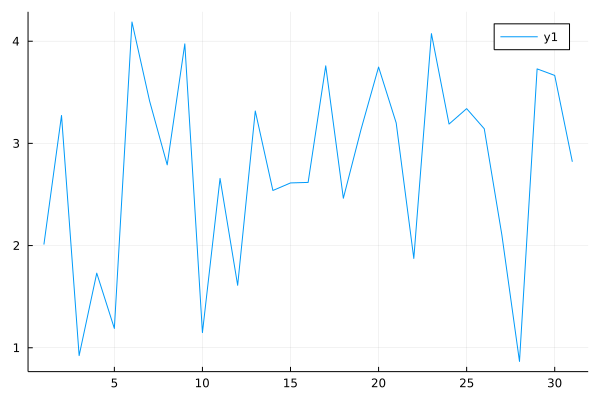